# Using qucat with the graphical circuit editor

In this example we study a typical circuit QED system consisting of a transmon qubit coupled to a resonator.

In [1]:
import numpy as np

# Import the graphical user interface
from qucat import GUI

# For the purpose of this tutorial, 
# we create a file describing the circuit.
# This file would usually be created from scratch
# by the user after opening the graphical circuit editor.
import os
os.makedirs('circuits/', exist_ok=True)
with open('circuits/transmon_LC_GUI.txt','w') as f:
    f.write("""C;0,-1;1,-1;1.000000e-15;
C;-1,0;-1,-1;1.000000e-13;
J;0,0;0,-1;8.000000e-09;
W;-1,0;0,0;;
W;-1,-1;0,-1;;
C;1,0;1,-1;1.000000e-13;
L;2,0;2,-1;1.000000e-08;
W;1,0;2,0;;
W;1,-1;2,-1;;
G;2,1;2,0;;
G;-1,1;-1,0;;
R;3,0;3,-1;1.000000e+06;
W;2,0;3,0;;
W;2,-1;3,-1;;
""")

## Construct the circuit

Below we open the editor. All changes made to the circuit are saved automatically to the file ``circuits/transmon_LC_GUI.txt`` and when we shut down the editor, the variable ``cir`` here will become a quantum circuit object ``qucat.Qcircuit`` with which we will analyze the circuit.

**Note: by default the junction is parametrized by its josephson inductance**

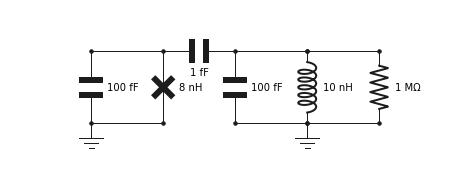

C 1 2 1 fF
C 0 1 100 fF
J 0 1 8 nH
C 0 2 100 fF
L 0 2 10 nH
R 0 2 1 MOhm




In [2]:
cir = GUI('circuits/transmon_LC_GUI.txt', # location of the circuit file
        edit=True, # open the GUI to edit the circuit
        plot=True, # plot the circuit after having edited it
        print_network=True # print the network
       )

The netork printed above allows one to verify that the circuit is indeed correct. The first symbol corresponds to the type of element (``C``, ``J``, ``L``, ``R`` for capacitors, junctions, inductors and resistors respectively). The second two following integers correspond to the nodes between which the component is created. Here ``0`` corresponds to the ground node, and we can see that node ``1`` is directly connected to ground through only two elements, a capacitor and a junction. Finally, the last part of a line corresponds to the value of that component.

## Circuit parameters

We now calculate the eigenfrequency, loss-rates, anharmonicity, and Kerr parameters of the circuit. 

This can be done through the functions ``eigenfrequencies``, ``loss_rates``, ``anharmonicities`` and ``kerr``, which return the specified quantities for each mode, **ordered with increasing mode frequency**.


### Eigen-frequencies

In [3]:
cir.eigenfrequencies()

array([5.00696407e+09, 5.60042136e+09])

This will return a list of the normal modes of the circuit, we can see they are seperated in frequency by 600 MHz, but we still do not which corresponds to the transmon, and which to the resonator.

To distinquish the two, we can calculate the anharmonicities of each mode.

### Anharmonicity

In [4]:
cir.anharmonicities()

array([5.82661131e+02, 1.91131050e+08])

The first (lowest frequency) mode, has a very small anharmonicity, whilst the second, has an anharmonicity of 191 MHz. The highest frequency mode thus corresponds to the transmon.

### Cross-Kerr or dispersive shift

In this regime of far detuning in frequency, the two modes will interact through a cross-Kerr or dispersive shift, which quantifies the amount by which one mode will shift if frequency if the other is populated with a photon.

We can access this by calculating the Kerr parameters ``K``. In this two dimensional array, the components ``K[i,j]`` correspond to the cross-Kerr interaction of mode ``i`` with mode ``j``. 

In [5]:
K = cir.kerr()
print("%.2f kHz"%(K[0,1]/1e3))

667.43 kHz


From the above, we have found that the cross-Kerr interaction between these two modes is of about 670 kHz.

This should correspond to $2\sqrt{A_0A_1}$ where $A_i$ is the anharmonicity of mode $i$. Let's check that:

In [6]:
A = cir.anharmonicities()
print("%.2f kHz"%(2*np.sqrt(A[0]*A[1])/1e3))

667.43 kHz


### Loss rates

In the studied circuit, the only resistor is located in the resonator. In this regime of large frequency, detuning, we would thus expect the resonator to be more lossy than the transmon.

In [7]:
cir.loss_rates()

array([786052.42260108,   1920.57996173])

### $T_1$ times

When converting these rates to $T_1$ times, one should not forget the $2\pi$ in the conversion

In [8]:
T_1 = 1/cir.loss_rates()/2/np.pi
print(T_1)

[2.02473701e-07 8.28681681e-05]


All these relevant parameters (frequency, dissipation, anharmonicity and Kerr parameters) can be computed using a single function

In [9]:
cir.f_k_A_chi()

(array([5.00696407e+09, 5.60042136e+09]),
 array([786052.42260108,   1920.57996173]),
 array([5.82661131e+02, 1.91131050e+08]),
 array([[5.82661131e+02, 6.67426802e+05],
        [6.67426802e+05, 1.91131050e+08]]))

Using the option ``pretty_print = True`` a more readable summary can be printed

In [10]:
f,k,A,chi = cir.f_k_A_chi(pretty_print=True)

    mode |  freq.  |  diss.  |  anha.  |
       0 | 5.01 GHz | 786 kHz |  583 Hz |
       1 | 5.6 GHz | 1.92 kHz | 191 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
    mode |    0    |    1    |
       0 |  583 Hz |         |
       1 | 667 kHz | 191 MHz |



## Sweeping a parameter

In [23]:
# For the second part of this tutorial, we will need
# a new circuit defined by the file below.
# This file would usually be created from scratch
# by the user after opening the graphical circuit editor.

with open('circuits/transmon_LC_GUI_symbolic.txt','w') as f:
    f.write("""C;0,-1;1,-1;1.000000e-15;C_c
C;-1,0;-1,-1;1.000000e-13;
J;0,0;0,-1;;L_J
W;-1,0;0,0;;
W;-1,-1;0,-1;;
C;1,0;1,-1;1.000000e-13;
L;2,0;2,-1;1.000000e-08;
W;1,0;2,0;;
W;1,-1;2,-1;;
G;2,1;2,0;;
G;-1,1;-1,0;;
R;3,0;3,-1;1.000000e+06;
W;2,0;3,0;;
W;2,-1;3,-1;;
""")

Below we open the editor again, this time with a different file, corresponding to a slightly different circuit.

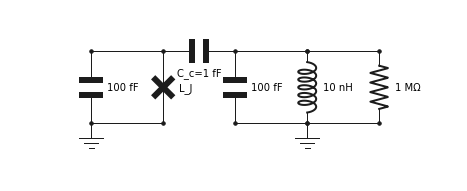

In [24]:
cir = GUI('circuits/transmon_LC_GUI_symbolic.txt', # location of the circuit file
        edit=True, # open the GUI to edit the circuit
        plot=True, # plot the circuit after having edited it
        print_network=False # print the network
       )

Notice that the junction does not have a value anymore
here but a symbolic label ``L_J``.
This is because in this example, 
we wish to sweep the josephson inductance.

The most computationally expensive part of the 
analysis is performed upon initializing the circuit. 
To avoid doing at each iteration of our sweep, 
we have the option to enter a symbolic value for a component.
    
Its value can then be passed
as a keyword argument in subsequent function calls ``L_J=1e-9``. 

The code below computes the frequency, anharmonicity, loss rates, and Kerr parameters of the circuit for a varying Josephson inductance.

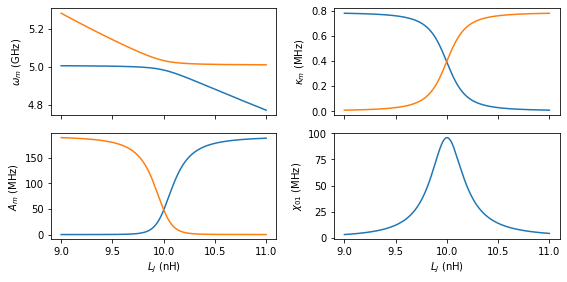

In [25]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of plots
fig,ax = plt.subplots(2,2,sharex = True,figsize = (8,4))

# Here we specify the values the junction inductance should take
L_J_list = np.linspace(11e-9,9e-9, 1001)

# Calculate an the eigenfrequencies, loss-rates, anharmonicities and Kerr-parameters
freqs,losses,anharmonicities,chi = cir.f_k_A_chi(L_J = L_J_list)

# plot the frequencies
ax[0][0].plot(L_J_list*1e9,freqs[0]/1e9) # for mode 0
ax[0][0].plot(L_J_list*1e9,freqs[1]/1e9) # for mode 1
ax[0][0].set_ylabel('$\omega_m$ (GHz)')

# plot the loss-rates
ax[0][1].plot(L_J_list*1e9,losses[0]/1e6)
ax[0][1].plot(L_J_list*1e9,losses[1]/1e6)
ax[0][1].set_ylabel('$\kappa_m$ (MHz)')

# plot the anharmonicities
ax[1][0].plot(L_J_list*1e9,anharmonicities[0]/1e6)
ax[1][0].plot(L_J_list*1e9,anharmonicities[1]/1e6)
ax[1][0].set_ylabel('$A_m$ (MHz)')

# plot the dispersive shift
ax[1][1].plot(L_J_list*1e9,chi[0,1]/1e6)
ax[1][1].set_ylabel('$\chi_{01}$ (MHz)')

# set the x labels
ax[1][0].set_xlabel('$L_J$ (nH)')
ax[1][1].set_xlabel('$L_J$ (nH)')

# display the plot
plt.tight_layout()
plt.show()

## Visualizing normal modes

We now concentrate on the resonance point, when the normal mode splitting occurs ``L_J = 10e-9``

We use the ``show_normal_mode`` function to visualize the two different modes.

In the plot below, the size and annotation of the arrows corresponds to the complex amplitude of the current entering a component if a single-photon coherent state were populating a given mode ``m``.

In the limit of high quality factor modes, this amplitude is approximately equal to the contribution of the mode ``m`` to the zero-point fluctuations in current $i_\text{zpf,m}$ entering that component, such that the operator for the total current entering a component is

$\hat{i} = \sum_m i_\text{zpf,m}(\hat{a}_m+\hat{a}_m^\dagger)$

where $\hat{a}_m$ is the annihilation operator of mode ``m``.

The direction of the arrows show what we are defining as positive current for that component.

By changing the parameter ``quantity``, we show the value of other zero-point fluctuations, and we can enter ``'voltage'``, ``'charge'``, or ``'flux'``.

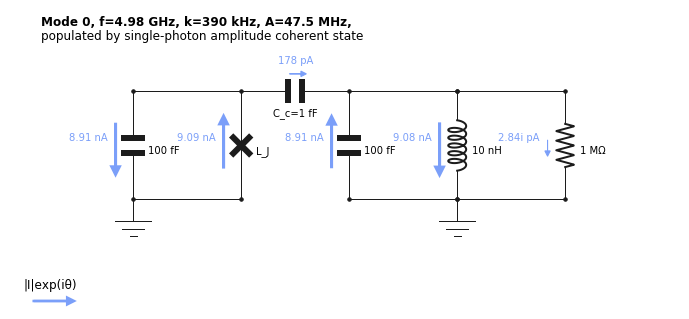

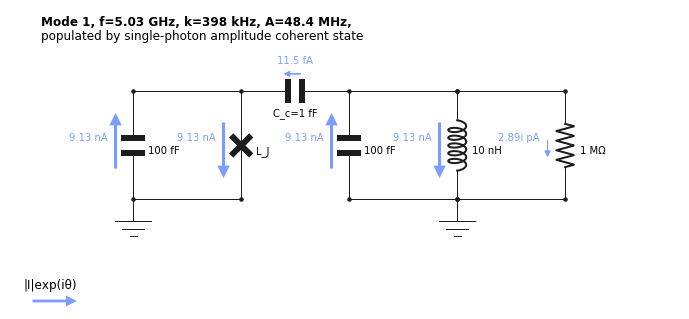

In [26]:
cir.show_normal_mode(mode=0,quantity='current', L_J = 10e-9)
cir.show_normal_mode(mode=1,quantity='current', L_J = 10e-9)

We see above that the symmetry on each side of the coupling capacitor is changing between the modes, the above is called the anti-symmetric mode, with a voltage build-up on either side of the coupling capacitor leading to a larger current going through it. Mode 1 is the anti-symmetric mode.

These zero-point fluctuations can also be accessed programmatically as we will now show: 

The lower frequency (anti-symmetric)  mode has a frequency:

In [27]:
f = cir_net.eigenfrequencies()[0]
print("%.2f GHz"%(f/1e9))

4.98 GHz


Which is lower due a higher zero-point current fluctuation in the coupling capacitor

In [28]:
zpf = coupling_capacitor.zpf(mode = 0, quantity = 'current')
print("%.2f pA"%(np.absolute(zpf)*1e12))

178.14 pA


Compared to the symmetric mode with frequency:

In [29]:
f = cir_net.eigenfrequencies()[1]
print("%.2f GHz"%(f/1e9))

5.03 GHz


with smaller zero-point current fluctuation in the coupling capacitor

In [31]:
zpf = coupling_capacitor.zpf(mode = 1, quantity = 'current')
print("%.2f pA"%(np.absolute(zpf)*1e12))

0.01 pA


## Further analysis in QuTiP

The Hamiltonian of the circuit, with the non-linearity of the Josephson junctions
Taylor-expanded, is given by

$\hat{H} = \sum_{m\in\text{modes}} hf_m\hat{a}_m^\dagger\hat{a}_m +\sum_j\sum_{2n\le\text{taylor}}E_j\frac{(-1)^{n+1}}{(2n)!}\left(\frac{\phi_{zpf,m,j}}{\phi_0}(\hat{a}_m^\dagger+\hat{a}_m)\right)^{2n}$

And in its construction, we have the freedom to choose the set of ``modes`` to include, the order of the Taylor expansion of the junction potential, and the number of excitations of each mode to consider.

We will use the diagonalization of the hamiltonian to produce the evolution of two first transition frequencies of the system as a function of ``L_J``

In [32]:
# This will hold the calculated eigen-energies of the system
eigen_energies = []

# Values of the josephson inductance we will be sweeping
L_J = np.linspace(10e-9,8e-9, 101)

for x in L_J:
    # The hamiltonian function returns a QuTiP Hamiltonian where (h=1), meaning
    # that the hamiltonian has units of frequency (not angular frequency)
    H = cir.hamiltonian(
        modes = [0,1],# Consider modes 0 and 1
        taylor = 8,# Expand the Josephson potential up to the 8th order
        excitations = [10,12], # Consider 10 excitations in the lower frequency mode 0, 12 in mode 1
        L_J = x)# We have to specify a value of the josephson inductance
                # since we didn't specify it when constructing the circuit
        
    # Calculate the eigenenergies (here in units of frequency) using the qutip
    # function eigenenergies, and add the values to the eigen_energies list
    eigen_energies.append(H.eigenenergies())
    
# Qutip will return complex values with 0 imaginary parts, 
# we want to convert them to real numbers here
eigen_energies = np.absolute(eigen_energies)

We now plot the two first eigenergies of the system

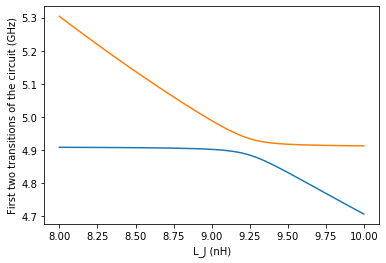

In [33]:
first_transition = (eigen_energies[:,1]-eigen_energies[:,0])
second_transition = (eigen_energies[:,2]-eigen_energies[:,0])

plt.plot(L_J*1e9,first_transition/1e9)
plt.plot(L_J*1e9,second_transition/1e9)
plt.xlabel('L_J (nH)')
plt.ylabel('First two transitions of the circuit (GHz)')
plt.show()

Note that the splitting does not occur at 10nH anymore. This is because the Transmon "bare" frequency is shifted by the quantum fluctuations through the junctions.

However, the magnitude of the frequency spliting that occurs is approximately the same and can be predicted without recourse to a Hamiltonian diagonalization. This splitting is also twice the coupling $g$ that one would use when formulating this problem in the context of the Rabi or Jaynes-Cummings Hamiltonian.

In [34]:
rabi_splitting = min(second_transition-first_transition)/1e6
mode_splitting = (cir.eigenfrequencies(L_J=10e-9)[1]-cir.eigenfrequencies(L_J=10e-9)[0])/1e6

print("Quantum calculation -- Rabi splitting is %.2f MHz"%rabi_splitting)
print("Classical calculation -- normal-mode splitting is %.2f MHz"%mode_splitting)

Quantum calculation -- Rabi splitting is 49.64 MHz
Classical calculation -- normal-mode splitting is 49.58 MHz
